In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [159]:
tata=pd.read_csv(r'C:\Users\USER\OneDrive\Documents\tata.csv')

In [161]:
tata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [163]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [165]:
tata['Date']=pd.to_datetime(tata['Date'])

In [167]:
print(f'Dataframe contains stock prices between {tata.Date.min()} {tata.Date.max()}')
print(f'Total days = {(tata.Date.max() - tata.Date.min()).days} days')

Dataframe contains stock prices between 2018-02-05 00:00:00 2022-02-04 00:00:00
Total days = 1460 days


In [169]:
tata.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


<Axes: >

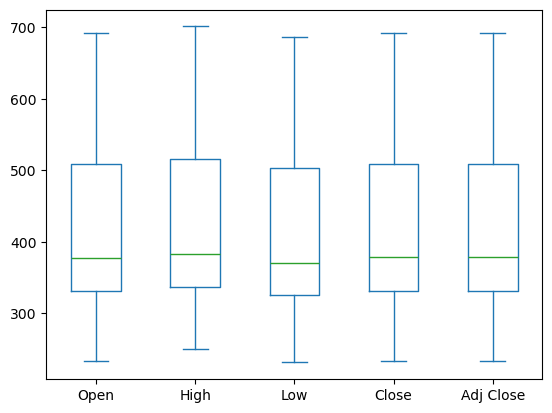

In [171]:
tata[['Open','High','Low','Close','Adj Close']].plot(kind='box')

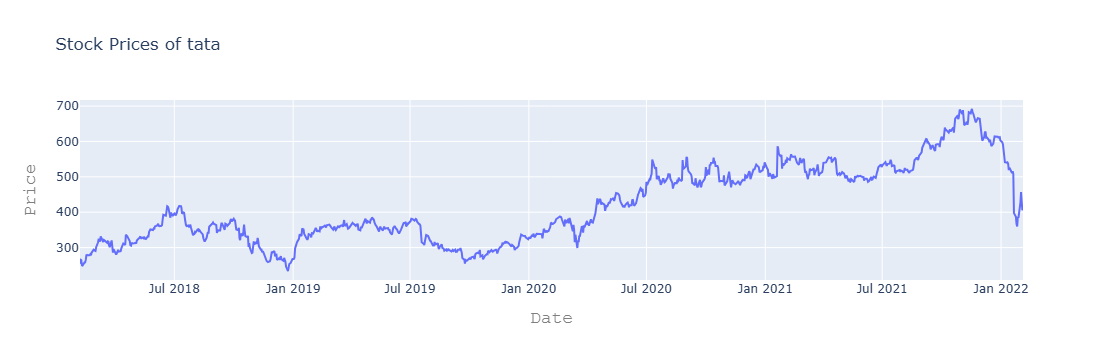

In [173]:
# Setting the Layout for our plot
layout = go.Layout(
    title='Stock Prices of tata',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# Creating the scatter plot
tata_trace = go.Scatter(
    x=tata['Date'],
    y=tata['Close'],
    mode='lines',
    name='Tata Stock Prices'
)

# Creating the figure with the data and layout
fig = go.Figure(data=[tata_trace], layout=layout)

# Plotting the figure
fig.show()

In [175]:
# Building the regression model
from sklearn.model_selection import train_test_split

# For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Module evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score



In [177]:
#Split the data into train and test sets
X = np.array(tata.index).reshape(-1,1)
Y = tata['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=101)

In [179]:
# Feature scaling
scaler = StandardScaler().fit(X_train)


In [181]:
from sklearn.linear_model import LinearRegression

In [183]:
#creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [185]:

# Actual values
trace0 = go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
# Predicted values
trace1 = go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
tata = [trace0, trace1]
layout.xaxis.title.text ='Day'
layout.yaxis.title.text ='Price'
plot2 = go.Figure(data=tata, layout=layout)

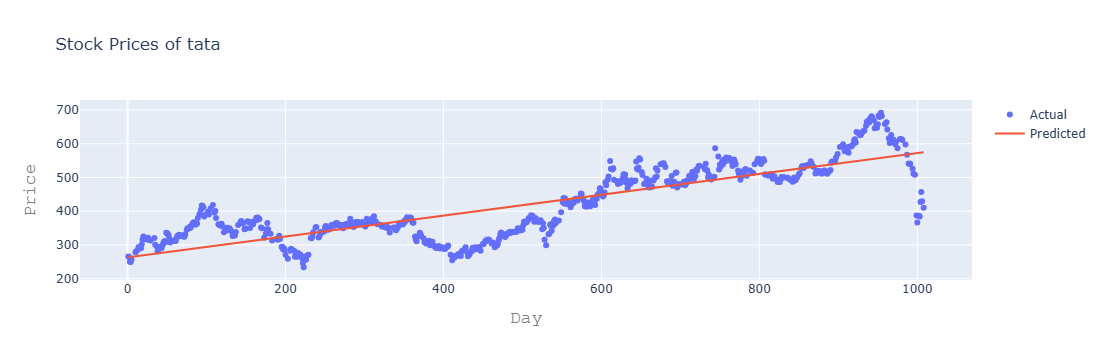

In [187]:
iplot(plot2)

In [189]:
# Calculate the scores
train_r2 = r2_score(Y_train, lm.predict(X_train))
test_r2 = r2_score(Y_test, lm.predict(X_test))
train_mse = mse(Y_train, lm.predict(X_train))
test_mse = mse(Y_test, lm.predict(X_test))
# Format the scores
scores = f"""
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{str(train_r2).center(20)}{str(test_r2).center(20)}
{'MSE'.ljust(10)}{str(train_mse).center(20)}{str(test_mse).center(20)}
"""
print(scores)



Metric           Train                Test        
r2_score   0.6992669032944175  0.7261648669848495 
MSE        3403.003880002517   3460.9885809580633 

